In [1]:
import numpy as np
import librosa

In [2]:
from scipy.io import wavfile

In [3]:
from glob import glob

In [4]:
import os

In [5]:
DATA_DIR = 'data'

In [6]:
files = glob(os.path.join(DATA_DIR, 'train/audio/bed/*wav'))

In [8]:
%%time
batch = []
for file in files:
    rate, signal = wavfile.read(file)
    fbank = librosa.feature.melspectrogram(signal, rate)
    batch.append(fbank)
batch = np.array(batch)

ValueError: could not broadcast input array from shape (128,32) into shape (128)

In [14]:
arr = np.ndarray(batch)

ValueError: sequence too large; cannot be greater than 32

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
fbank_1.shape

(128, 1876)

In [25]:
fbank_0.shape

(5999, 26)

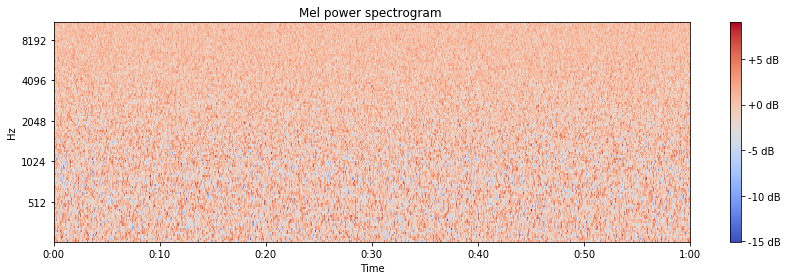

In [43]:
# Convert to log scale (dB). We'll use the peak power (max) as reference.
#log_S = librosa.power_to_db(fbank_1, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

In [35]:
log_S.shape

(128, 1876)

In [36]:
rate

16000

In [40]:
log_S -= np.mean(log_S)